# Tackling Fashion MNIST with a CNN

## Importing libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from functools import partial

## Loading and preprocessing dataset

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [4]:
x_mean = x_train.mean(axis = 0, keepdims = True)
x_std = x_train.std(axis = 0, keepdims = True) + 1e-7

In [5]:
x_train = (x_train - x_mean) / x_std
x_valid = (x_valid - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [6]:
x_train = x_train[..., np.newaxis]
x_valid = x_valid[..., np.newaxis]
x_test = x_test[..., np.newaxis]

## Modelling and training

In [8]:
Default_conv_2D = partial(keras.layers.Conv2D, kernel_size = 3, activation = 'relu', padding = 'SAME')

In [10]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [11]:
model = keras.models.Sequential()
model.add(Default_conv_2D(filters = 64, kernel_size = 7, input_shape = [28, 28, 1]))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(Default_conv_2D(filters = 128))
model.add(Default_conv_2D(filters = 128))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(Default_conv_2D(filters = 256))
model.add(Default_conv_2D(filters = 256))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

- The first layer uses 64 fairly large filters (7x7) but no stride since the input images are not very large. It also set the input shape as [28, 28, 1] since the images are monochromatic so only one channel.
- Next we have a max pooling layer with a pooling size of 2. It divides the spatial dimensions of the image by a factor of 2.
- Then we have repeat the same structure twice: two conv. layers followed by a max pooling layer. For larger images, we could repeat this structure several more times. the no. of repetitions is hyperparameter we can tune.
- Note that the no. of filters grows as we climb up the network towards the output layer. It makes sense for it to grow as the no. of low level features are fairly low, whereas there are many different ways to combine them into high level features. It is a common practice to double the no.. of filters after each pooling layer. Since the pooling layer reduces the dimensions by a factor of two, we can increase the no. of filters without the fear of exploding the no. of parameters, memory usage or computational load.
- Next is the fully connected network, composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. We have also addded 2 dropout layers with dropout rate of 50% to reduce overfitting.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [13]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = 'nadam', metrics = ['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7079 - accuracy: 0.7521 - val_loss: 0.3688 - val_accuracy: 0.8718
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4178 - accuracy: 0.8608 - val_loss: 0.3188 - val_accuracy: 0.8824
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3654 - accuracy: 0.8773 - val_loss: 0.3179 - val_accuracy: 0.8838
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3292 - accuracy: 0.8902 - val_loss: 0.2980 - val_accuracy: 0.8894
Epoch 5/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3085 - accuracy: 0.8965 - val_loss: 0.2856 - val_accuracy: 0.8982
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2905 - accuracy: 0.9024 - val_loss: 0.3079 - val_accuracy: 0.8946
Epoch 7/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2758 - accuracy: 0.9056 - val_loss: 0.2826 -

In [15]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3063 - accuracy: 0.9019


In [16]:
x_new = x_test[:10]
y_predict = model.predict(x_new)

In [17]:
y_predict

array([[1.7855339e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.0083626e-21, 1.3699449e-36, 1.4790195e-13,
        5.0681347e-33, 1.0000000e+00],
       [3.3154182e-15, 8.2821554e-38, 9.9999452e-01, 1.9429899e-24,
        3.1941016e-09, 0.0000000e+00, 5.4989678e-06, 0.0000000e+00,
        3.0635795e-25, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0083858e-29,
        2.4741798e-33, 0.0000000e+00, 4.3534475e-34, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.1702124e-30,
        1.4186356e-33, 0.0000000e+00, 5.1514993e-34, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8723889e-03, 3.4946507e-12, 1.9816069e-04, 1.8165918e-05,
        2.1485394e-04, 1.0295076e-16, 9.9769646e-01, 9.9120187e-16,
        1.0052700e-08, 6.6409242e-15],
       [9.7278594e-30, 1.0000000e+00, 2.5617375e-29, 5.8265316e-20,
        2.4130006e-22, 2.6919980e-38, 2.3893857e-23, 0.00

In [18]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## LeNet-5

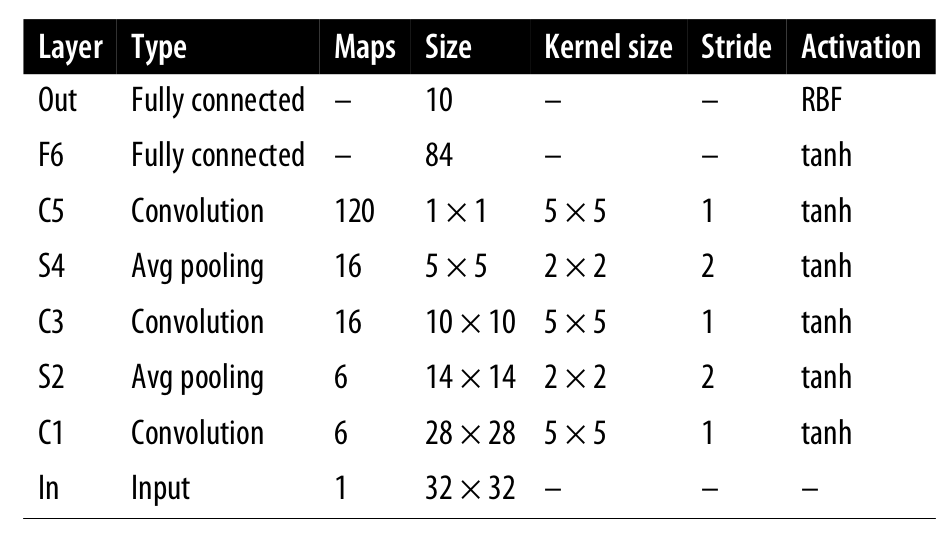

- Most widely known CNN architecture. The MNIST images are 28x28 pixels but they are zero padded to 32x32 pixels and normalized before being fed to the network. the rest of the network doesn't use any padding, thats why the size of the image keeps shrinking as it progresses through the network.
- The average pooling layers are complex than usual. Each neuron computes the mean of its inputs, then multiplies it by a learnable coefficient (one per map) and add it to a learnable bias (also one per map), then finally applies the activation function.
- Most neurons in C3 maps are connected to only three or four of the neurons in S2 maps(instead of all 6)
- In the ouput layer instead of computing the matrix multiplication of the input and weight vector, it outputs the Euclidian distance between the input and the weight vector. Each output measure how much the image belongs to a particular digit class. thus crossentropy cost func is much preferred as it penalizes the wrong predictions much more, thus creating larger gradients and converging faster.